# Telco Churn Analysis

**Dataset Info:**
Sample Data Set containing Telco customer data and showing customers left last month

In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

**Load the data file**

In [2]:
df = pd.read_csv(r"H:\ML Project\WA_Fn-UseC_-Telco-Customer-Churn.csv")

Look at the top 5 records of data

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Check the various attributes of data like shape (rows and cols), Columns, datatypes

In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# Checking the data types of all the columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# Check the descriptive statistics of numeric variables
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer

75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

# EDA(Exploratory Data Analysis)

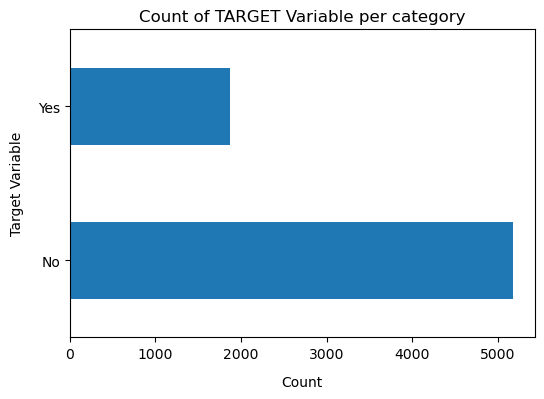

In [8]:
df['Churn'].value_counts().plot(kind='barh', figsize=(6, 4))
plt.xlabel("Count", labelpad=10)
plt.ylabel("Target Variable", labelpad=10)
plt.title("Count of TARGET Variable per category", y=1);

In [9]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [10]:
100*df['Churn'].value_counts()/len(df['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

* Non churner is 73% and churner is 27%
* Data is highly imbalanced, ratio = 73:27<br>
* So we analyse the data with other features while taking the target values separately to get some insights.

In [11]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### checking correlation between numerical columns bt correlation matrix.

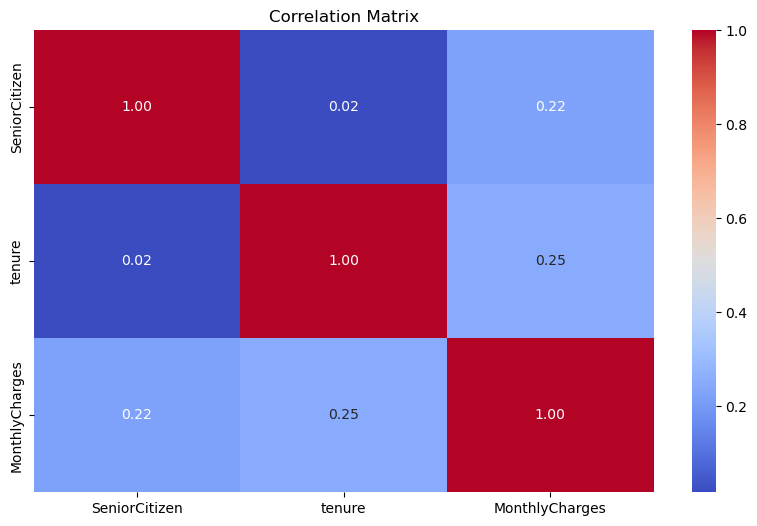

In [12]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=[int, float])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**Insight :** 

* Correlation between **Tenure & SeniorCitizen** is **0.02**(almost 0).So, there is **no** correlation between **Tenure & SeniorCitizen**. 

* Correlation between **Tenure & MonthlyCharges** is **0.25**.So, there is a **positive** correlation between **Tenure & MonthlyCharges**.

* Correlation between **SeniorCitizen & MonthlyCharges** is **0.22**.So, there also is a **positive** correlation between **SeniorCitizen & MonthlyCharges**.

* No **Multicollinearity** found.It means the variables are not highly correlated to each other.

### checking outliers in numerical columns by Boxplot.

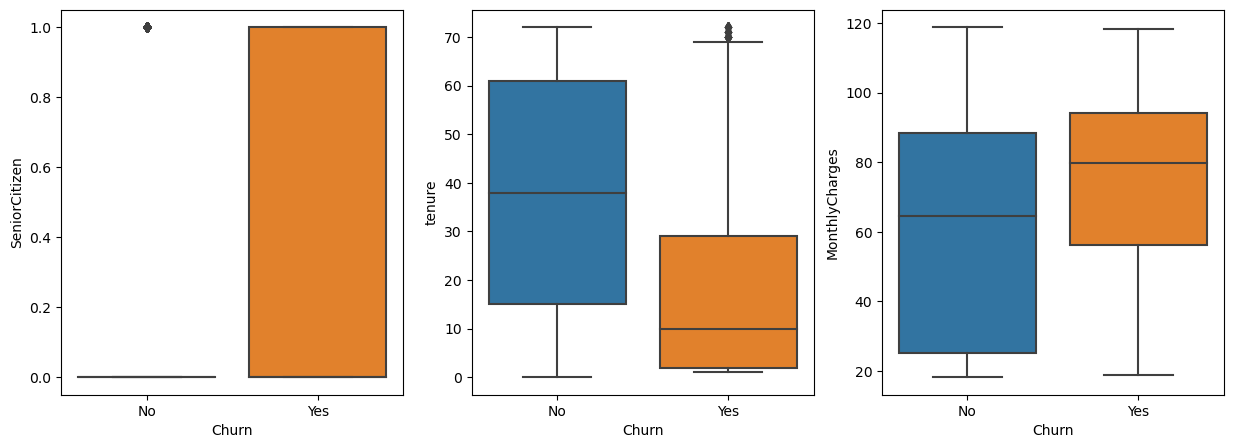

In [13]:
fig, ax = plt.subplots(1,3, figsize = (15,5))
for i, subplot in zip(numeric_columns, ax.flatten()):
    sns.boxplot(x = 'Churn', y = i , data = df, ax = subplot)

**Insight:**

* **Not much outlier** found.It means our dataset is not contain much noisy data or complex data.

### Checking percentage of missing value by Pointplot. 

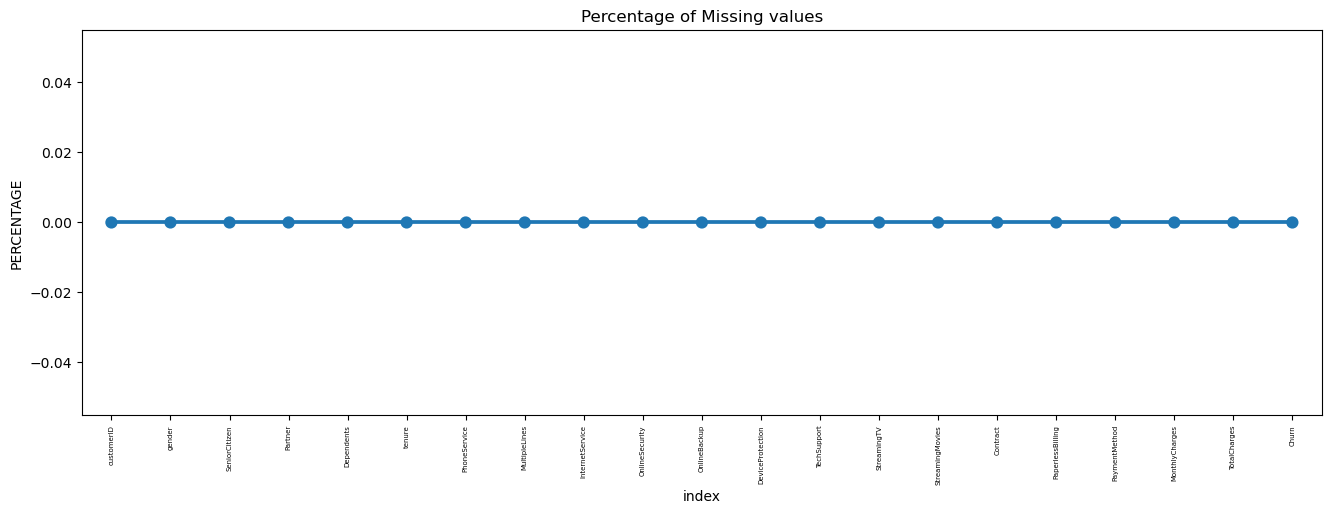

In [14]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=5)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

 **Missing Data - Initial Intuition**

* Here, we don't have any missing data.

General Thumb Rules:

* For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
* For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
* As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally we can delete the columns, if we have more than 30-40% of missing values. But again there's a catch here, for example, Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.

## Data Cleaning


**1.** Create a copy of base data for manupulation & processing

In [15]:
telco_data = df.copy()

**2.** Total Charges should be numeric amount. Let's convert it to numerical data type

In [16]:
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce')
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**3.** As we can see there are 11 missing values in TotalCharges column. Let's check these records 

In [17]:
telco_data.loc[telco_data ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**4. Missing Value Treatement**

In [18]:
missing_percentage = (telco_data['TotalCharges'].isnull().sum() / len(telco_data['TotalCharges'])) * 100
missing_percentage

0.1561834445548772

Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [19]:
#Removing missing values 
telco_data.dropna(how = 'any', inplace = True)

**5.** Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [20]:
# Get the max tenure
print(telco_data['tenure'].max()) #72

72


In [21]:
# Group the tenure in bins of 12 months
labels = [f"{i} - {i+11}" for i in range(1, 72, 12)]

telco_data['tenure_group'] = pd.cut(telco_data.tenure, range(1, 80, 12), right=False, labels=labels)

In [22]:
telco_data['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

**6.** Remove columns not required for processing

In [23]:
#drop column customerID and tenure
telco_data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## Data Exploration
**1.** Plot distibution of individual predictors by churn

### Univariate Analysis

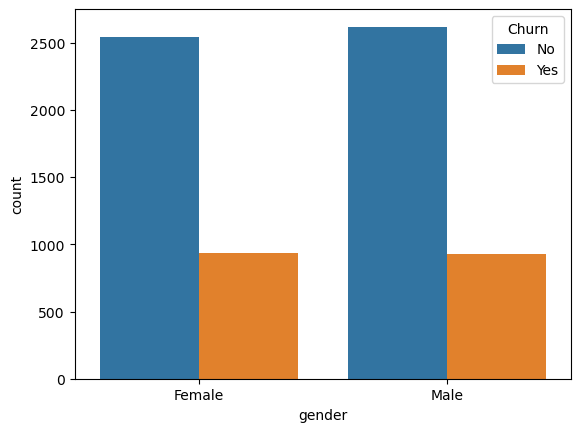

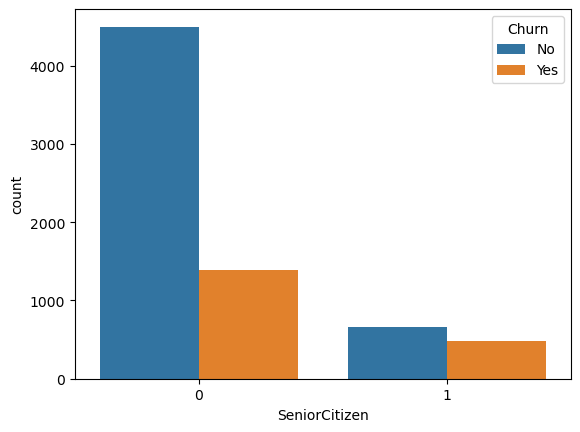

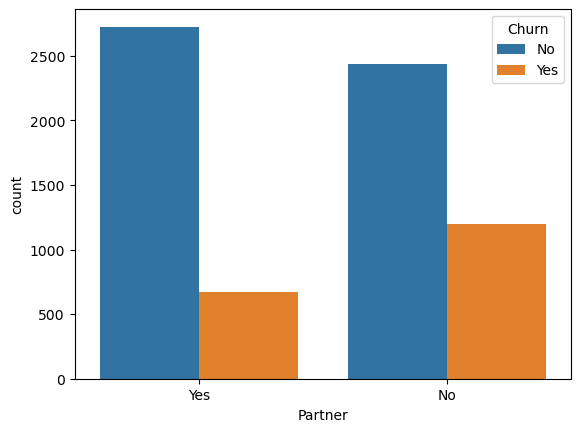

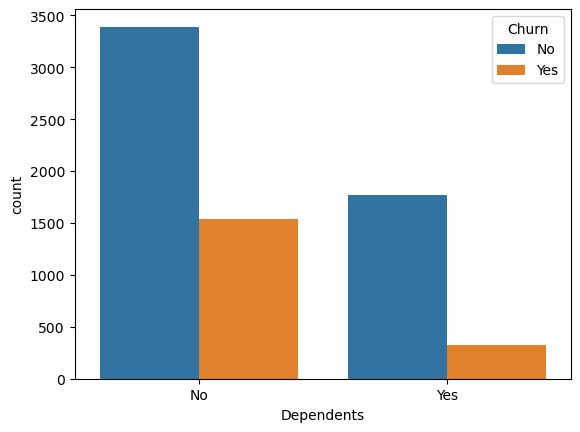

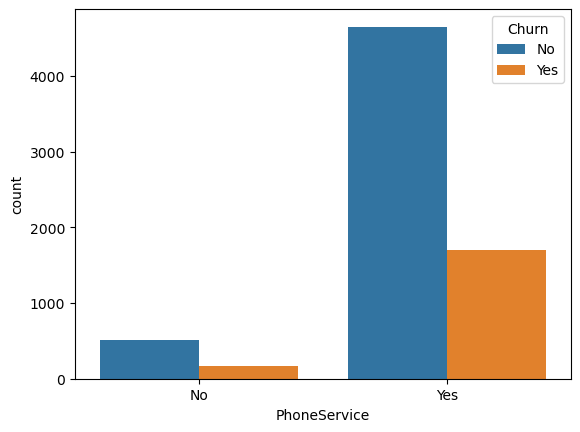

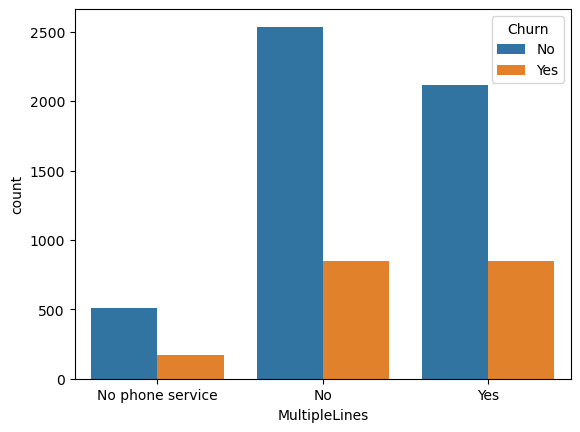

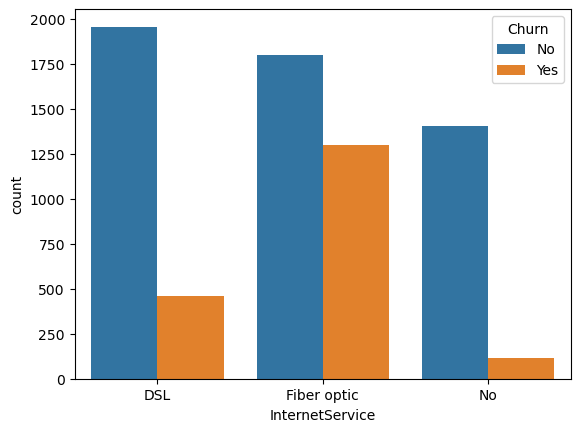

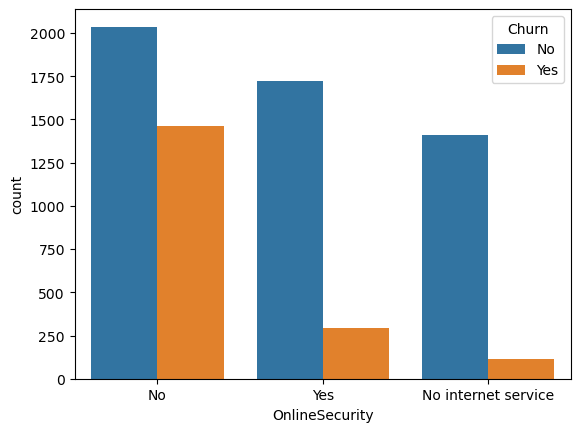

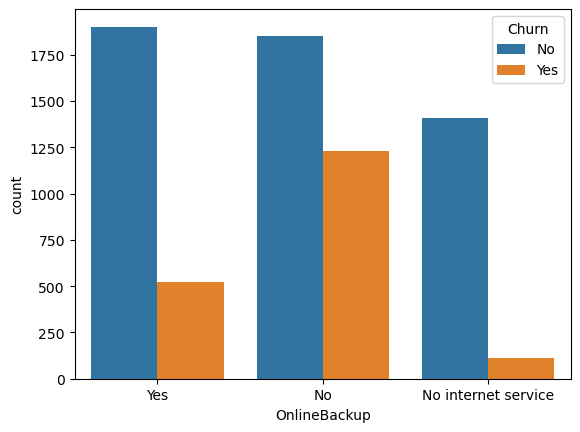

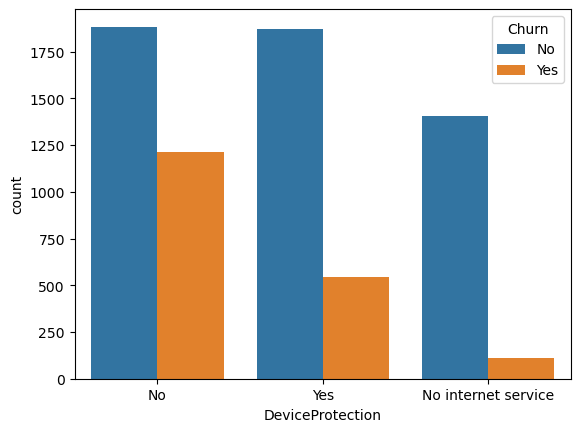

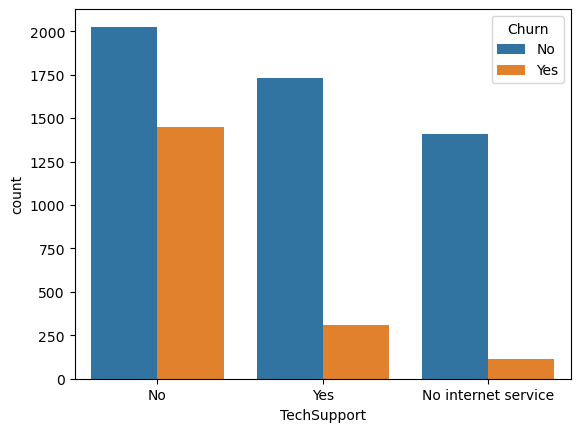

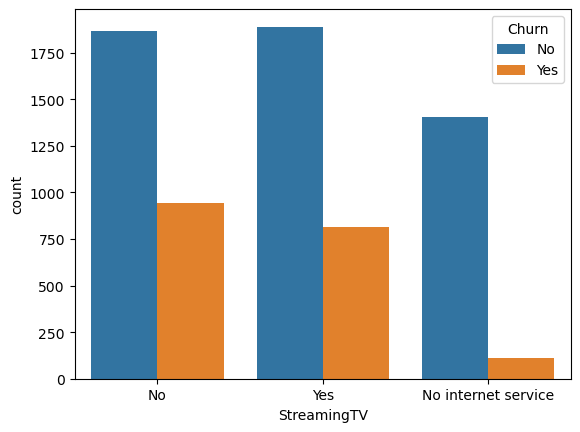

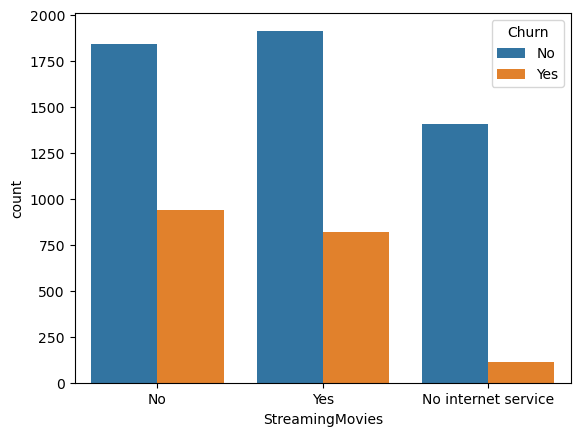

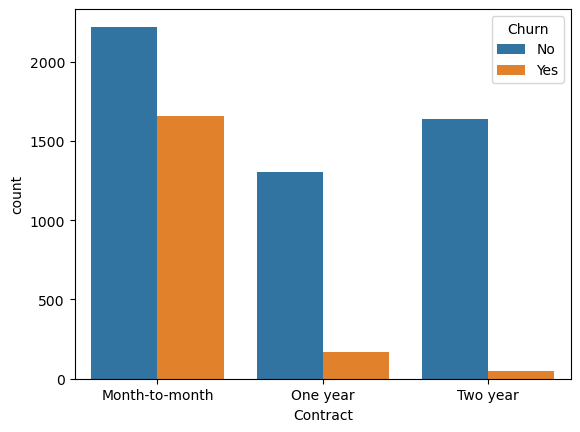

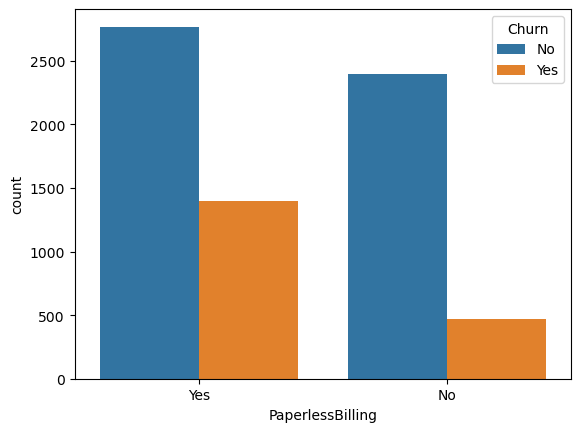

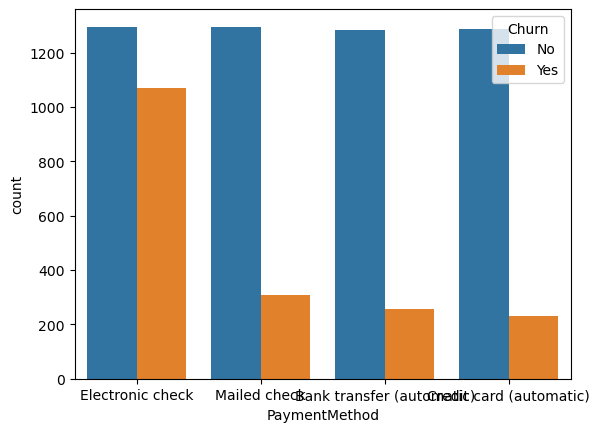

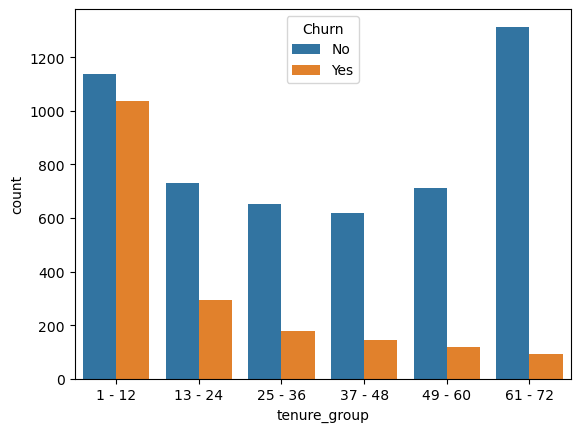

In [24]:
for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data, x=predictor, hue='Churn')

**2.** Convert the target variable 'Churn'  in a binary numeric variable i.e. Yes=1 ; No = 0

In [25]:
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes',1,0)

In [26]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


**3.** Convert all the categorical variables into dummy variables

In [27]:
telco_data_dummies = pd.get_dummies(telco_data, dtype = int)
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


**4.** Relationship between Monthly Charges and Total Charges

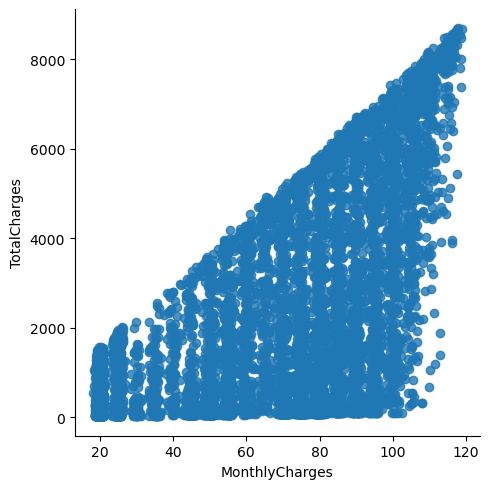

In [28]:
sns.lmplot(data=telco_data_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

Total Charges increase as Monthly Charges increase - as expected.

**5.** Churn by Monthly Charges and Total Charges

Text(0.5, 1.0, 'Monthly charges by churn')

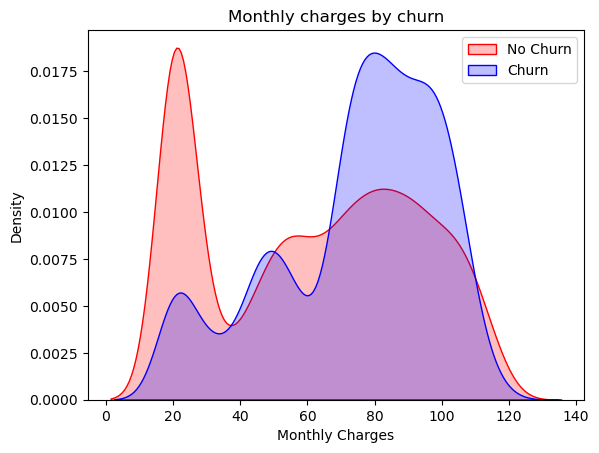

In [29]:
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", fill = True)
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", fill = True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

**Insight:** Churn is high when Monthly Charges ar high

Text(0.5, 1.0, 'Total charges by churn')

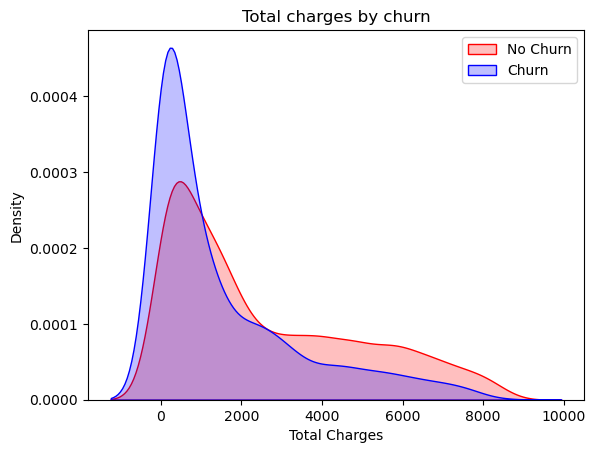

In [30]:
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", fill = True)
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", fill = True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

**Surprising insight** as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. **Tenure, Monthly Charges & Total Charges** then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors e.g. **Higher Monthly Charge**,  **Lower tenure** and **Lower Total Charge** are linkd to **High Churn**.

**6.** Build a corelation of all predictors with **Churn :**

<Axes: >

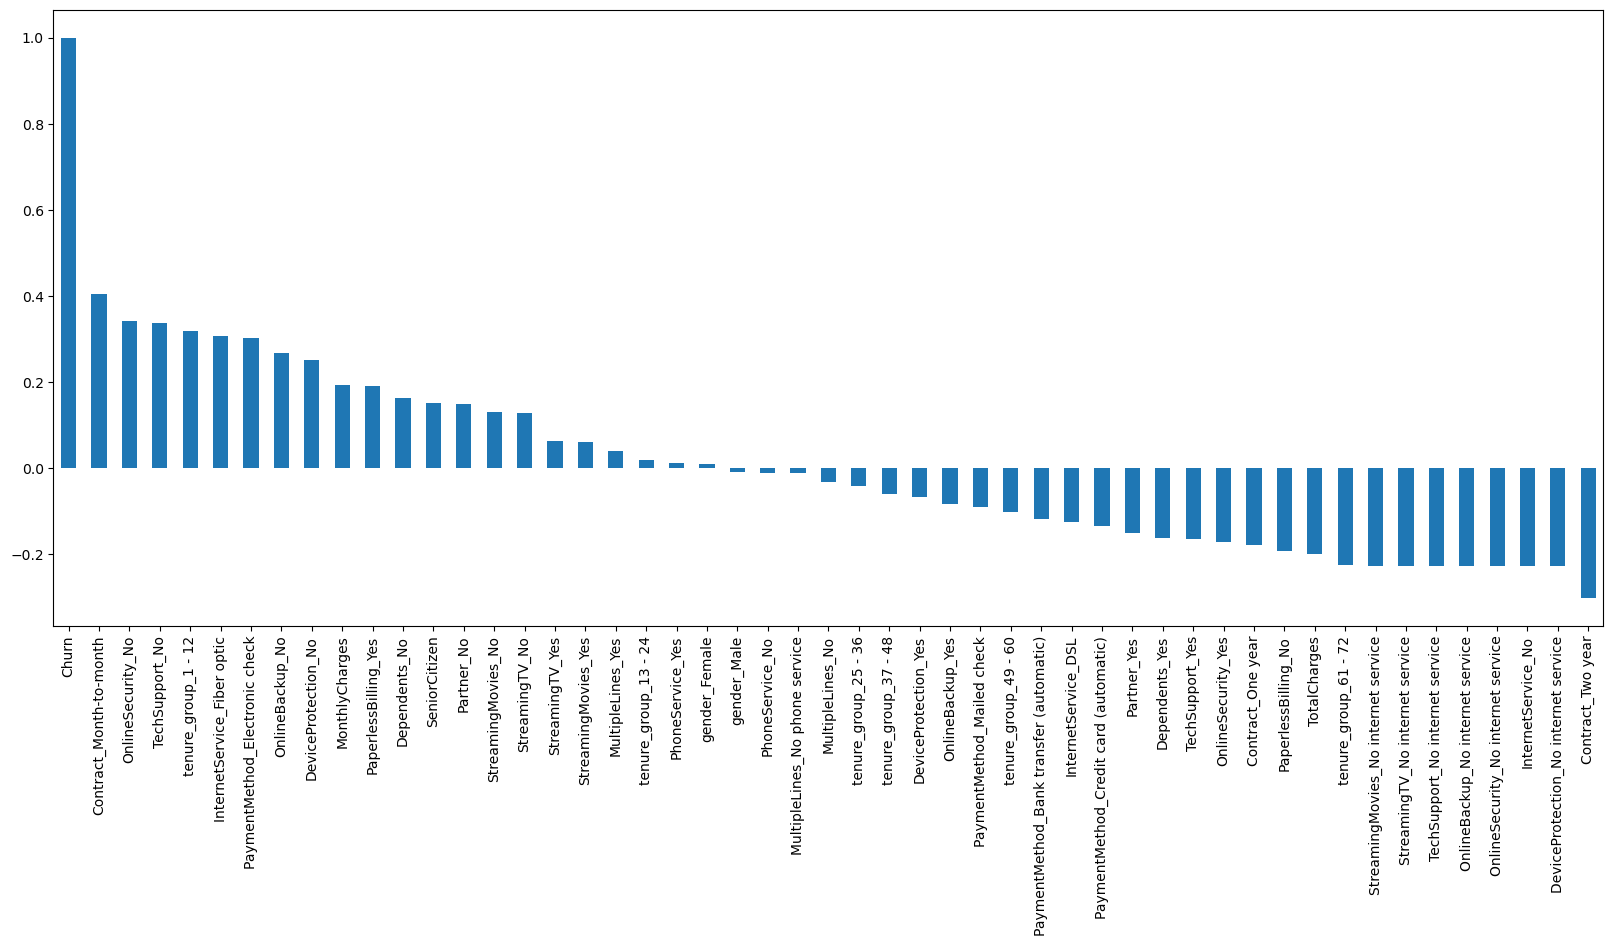

In [31]:
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

**Derived Insight:**

**HIGH** Churn seen in case of  **Month to month contracts**, **No online security**, **No Tech support**, **First year of subscription** and **Fibre Optics Internet**

**LOW** Churn is seens in case of **Long term contracts**, **Subscriptions without internet service** and **The customers engaged for 5+ years**

Factors like **Gender**, **Availability of PhoneService** and **of multiple lines** have alomost **NO** impact on Churn

This is also evident from the **Heatmap** below

<Axes: >

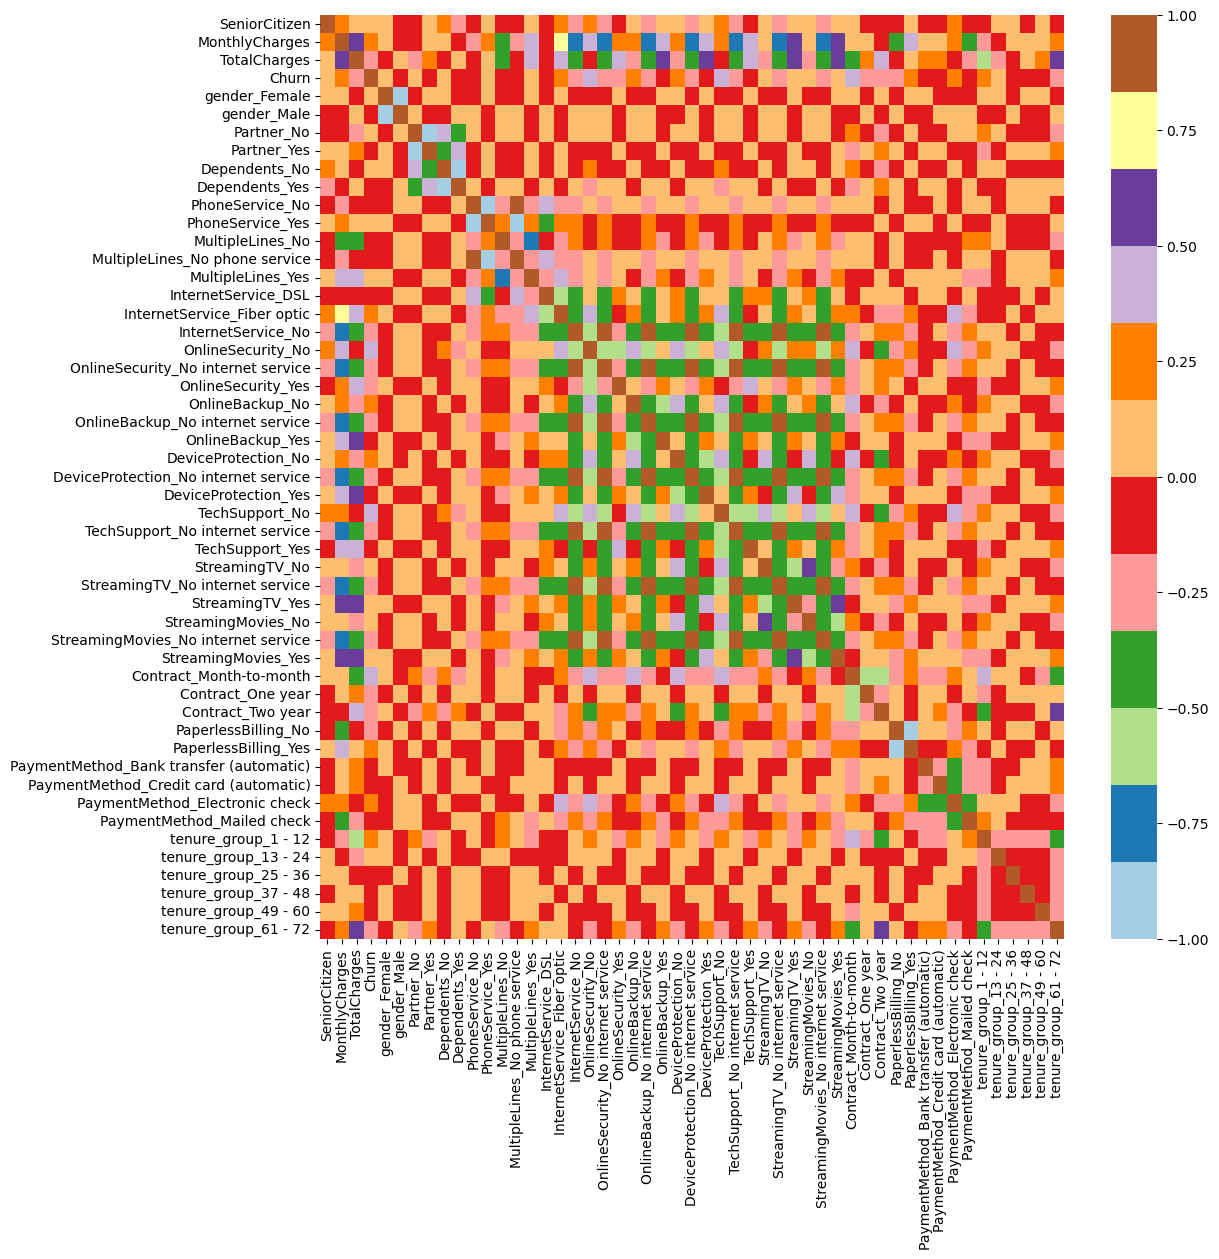

In [32]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_data_dummies.corr(), cmap="Paired")

### Bivariate Analysis

In [33]:
target0=telco_data.loc[telco_data["Churn"]==0]
target1=telco_data.loc[telco_data["Churn"]==1]

In [34]:
def uniplot(df,col,title,hue =None,figsize = (6,6)):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width,4)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

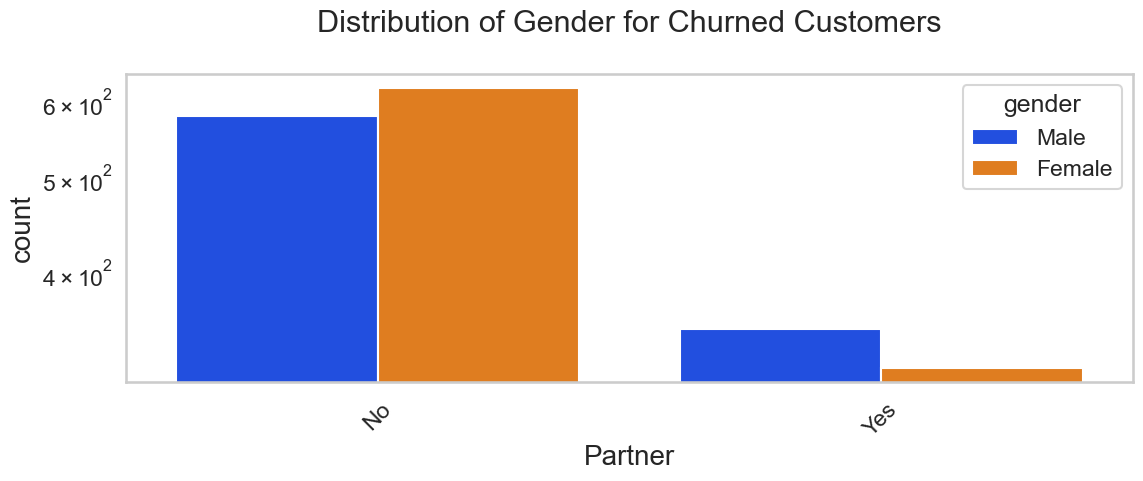

In [35]:
uniplot(target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

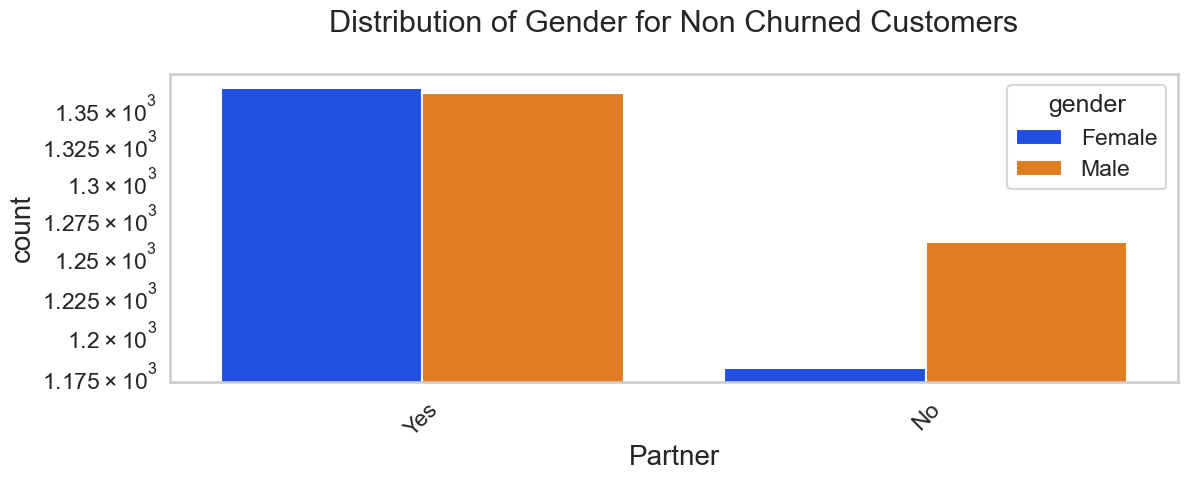

In [36]:
uniplot(target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

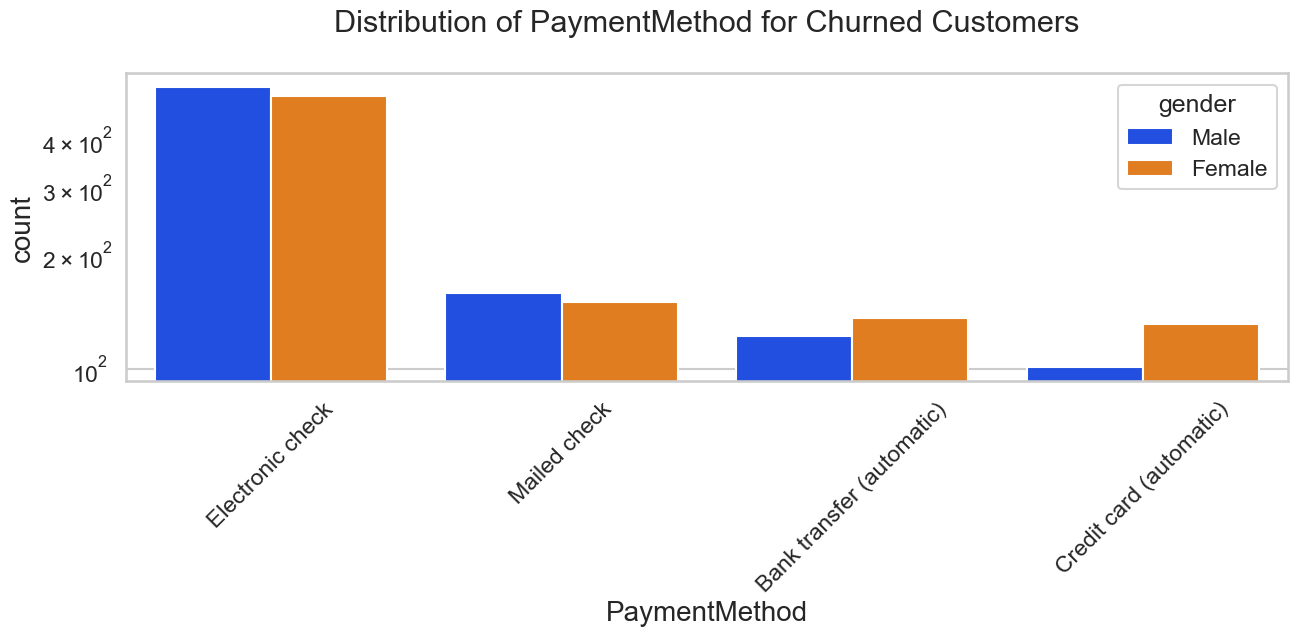

In [37]:
uniplot(target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

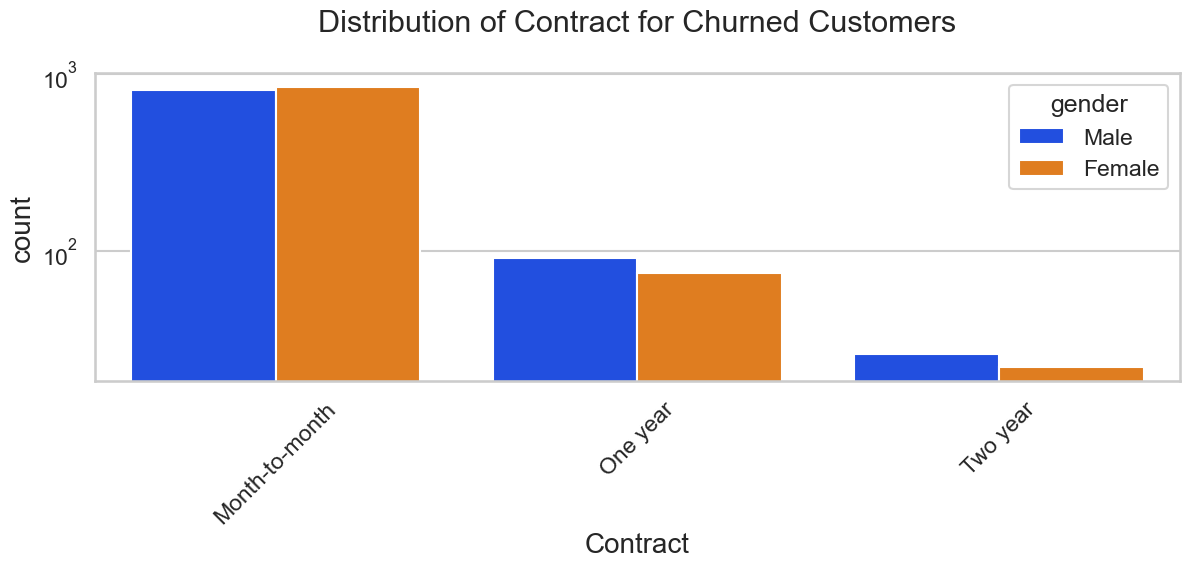

In [38]:
uniplot(target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

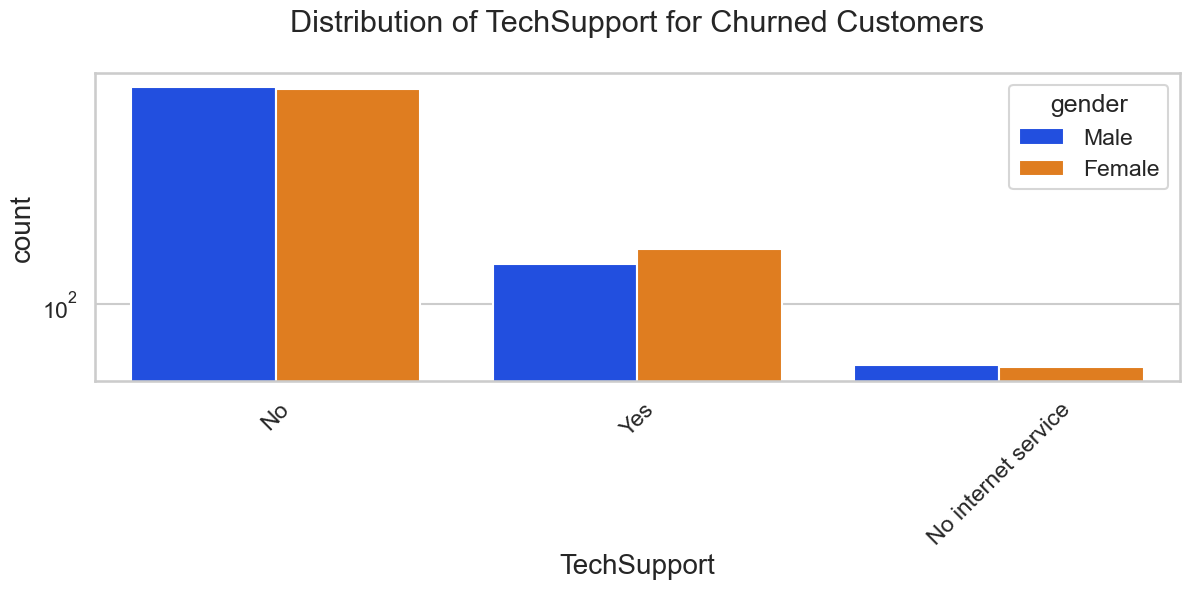

In [39]:
uniplot(target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

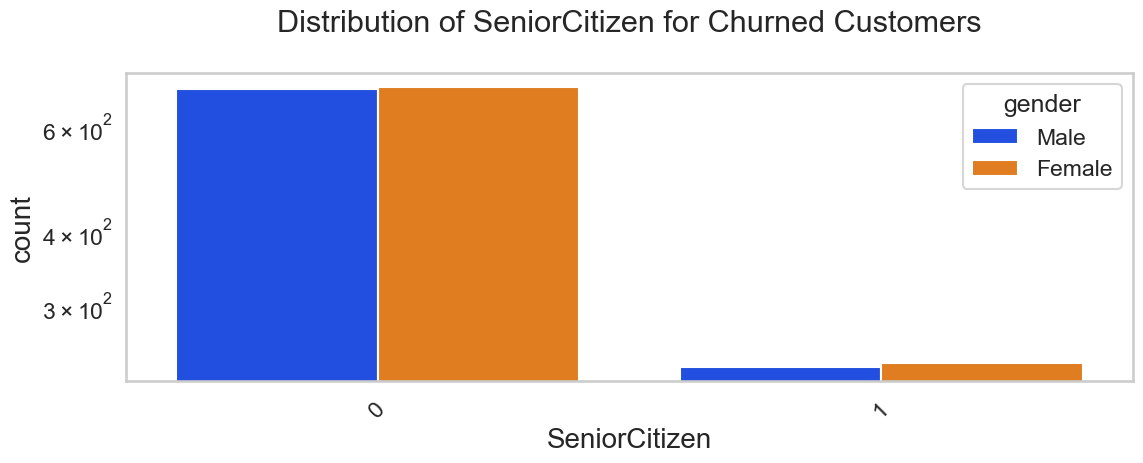

In [40]:
uniplot(target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

### CONCLUSION

These are some of the quick insights from this exercise:

1. Partner - Those who have not any partner are more likely to churn.
1. Payment Method - Electronic check are the highest churners.
2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
3. No Online security, No Tech Support category are high churners.
4. Non senior Citizens are high churners.


# Model Building

In [41]:
# Data manipulation libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

In [42]:
df1 = telco_data_dummies.copy()

In [43]:
df1.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [44]:
X=df1.drop('Churn',axis=1)        ## independent variables
X

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7039,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7040,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7041,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [45]:
y=df1['Churn']         ## dependent varable
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

* **Spliiting the data in Training and Test Data**

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [47]:
print(y_train.value_counts(normalize= True))
print(y_test.value_counts(normalize= True))

Churn
0    0.740267
1    0.259733
Name: proportion, dtype: float64
Churn
0    0.710021
1    0.289979
Name: proportion, dtype: float64


* **

In [48]:
# Hyperparameter options
C_range = [0.1, 1, 10]

# Create the model with hyperparameter options
logreg_cv = GridSearchCV(LogisticRegression(solver='liblinear', multi_class='auto'), cv=5, param_grid={'C': C_range})

# Fit the model to your data
logreg_cv.fit(X, y)

# Print the best score and parameters
print("Logistic Regression Best Score:", logreg_cv.best_score_)
print("Logistic Regression Best Parameters:", logreg_cv.best_params_)

Logistic Regression Best Score: 0.8019048225646811
Logistic Regression Best Parameters: {'C': 1}


In [49]:
# Hyperparameter options
n_estimators_range = [50, 100, 150]
learning_rate_range = [0.001, 0.01, 0.1]

# Create the model with hyperparameter options
adaboost_cv = GridSearchCV(AdaBoostClassifier(), cv=5, param_grid={'n_estimators': n_estimators_range, 
                                                                   'learning_rate': learning_rate_range})

# Fit the model to your data
adaboost_cv.fit(X, y)

# Print the best score and parameters
print("AdaBoost Best Score:", adaboost_cv.best_score_)
print("Adaboost Best Parameters:", adaboost_cv.best_params_)

AdaBoost Best Score: 0.803611590492973
Adaboost Best Parameters: {'learning_rate': 0.1, 'n_estimators': 150}


In [50]:
# Hyperparameter options
n_estimators_range = [50, 100, 150]
learning_rate_range = [0.001, 0.01, 0.1]
max_depth_range = [3, 5, 8]  # Added hyperparameter for tree depth

# Create the model with hyperparameter options
gb_cv = GridSearchCV(GradientBoostingClassifier(), cv=5, param_grid={'n_estimators': n_estimators_range,
                                                                   'learning_rate': learning_rate_range,
                                                                   'max_depth': max_depth_range})

# Fit the model to your data
gb_cv.fit(X, y)

# Print the best score and parameters
print("Gradient Boosting Best Score:", gb_cv.best_score_)
print("Gradient Boosting Best Parameters:", gb_cv.best_params_)

Gradient Boosting Best Score: 0.8053167408234179
Gradient Boosting Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [53]:
# Hyperparameter options
n_estimators_range = [50, 100, 200]
learning_rate_range = [0.01, 0.1]
max_depth_range = [3, 5, 8]  # Added hyperparameter for tree depth

# Create the model with hyperparameter options (adjust parameters as needed for XGBoost)
xgb_cv = GridSearchCV(XGBClassifier(), cv=5, param_grid={'n_estimators': n_estimators_range,
                                                         'learning_rate': learning_rate_range,
                                                         'max_depth': max_depth_range})

# Fit the model to your data
xgb_cv.fit(X, y)

# Print the best score and parameters
print("XGBoost Best Score:", xgb_cv.best_score_)
print("XGBoost Best Parameters:", xgb_cv.best_params_)

XGBoost Best Score: 0.8061700236876984
XGBoost Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [54]:
# Hyperparameter options
criterion_options = ['gini', 'entropy']
max_depth_range = [3, 5, 8]

# Create the model with hyperparameter options
dt_cv = GridSearchCV(DecisionTreeClassifier(), cv=5, param_grid={'criterion': criterion_options, 
                                                                 'max_depth': max_depth_range})

# Fit the model to your data
dt_cv.fit(X, y)

# Print the best score and parameters
print("Decision Tree Best Score:", dt_cv.best_score_)
print("Decision Tree Best Parameters:", dt_cv.best_params_)

Decision Tree Best Score: 0.7903848972977017
Decision Tree Best Parameters: {'criterion': 'entropy', 'max_depth': 5}


In [55]:
# Hyperparameter options
n_estimators_range = [50, 100, 200]
max_depth_range = [3, 5, 8]

# Create the model with hyperparameter options
rf_cv = GridSearchCV(RandomForestClassifier(), cv=5, param_grid={'n_estimators': n_estimators_range, 'max_depth': max_depth_range})

# Fit the model to your data
rf_cv.fit(X, y)

# Print the best score and parameters
print("Random Forest Best Score:", rf_cv.best_score_)
print("Random Forest Best Parameters:", rf_cv.best_params_)

Random Forest Best Score: 0.8011936861112039
Random Forest Best Parameters: {'max_depth': 8, 'n_estimators': 50}


As we can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy are cursed in imbalanced datasets.

Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score are too low for Class 1, i.e. churned customers.

Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

* **SMOTEENN :**

SMOTEENN (SMOTE-ENN) is a technique used to address class imbalance in machine learning, specifically for classification tasks. Class imbalance refers to situations where a dataset has a significant difference in the number of samples between different classes.

* SMOTEENN combines two techniques:

**SMOTE (Synthetic Minority Over-sampling Technique):** This technique creates synthetic samples for the minority class, essentially increasing its representation in the dataset.

**Edited Nearest Neighbors (ENN):** This technique helps clean the data by removing noisy or irrelevant samples from both the majority and minority classes.

In [56]:
from imblearn.combine import SMOTEENN

## create  pipeline  

In [57]:
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [58]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [59]:
telco_data['tenure_group'].unique()

['1 - 12', '25 - 36', '37 - 48', '13 - 24', '61 - 72', '49 - 60']
Categories (6, object): ['1 - 12' < '13 - 24' < '25 - 36' < '37 - 48' < '49 - 60' < '61 - 72']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(telco_data.drop('Churn',axis= 1), telco_data['Churn'],test_size= 0.25)

In [61]:
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

In [62]:
#transformers

categorical_cols = X_train.select_dtypes(include=['category','object']).columns

trf1 = ColumnTransformer([
    ('encoder', OneHotEncoder(sparse= False, handle_unknown= 'ignore'),categorical_cols)
], remainder= "passthrough")

trf2 = ColumnTransformer([
    ('scaler',MinMaxScaler(), slice(0,19))
])

trf3 = SelectKBest(score_func = chi2)

trf4 = SMOTEENN()

rf = RandomForestClassifier()

xgb = XGBClassifier()

gb = GradientBoostingClassifier()

In [63]:
rf_pipe = Pipeline([
    ('trf1',trf1),
    ('trf4',trf4),
    ('rf',rf)
])

xgb_pipe = Pipeline([
    ('trf1',trf1),
    ('trf4',trf4),
    ('xgb',xgb)
])

gb_pipe = Pipeline([
    ('trf1',trf1),
    ('trf4',trf4),
    ('gb',gb)
])

dt_pipe = Pipeline([
    ('trf1',trf1),
    ('trf4',trf4),
    ('dtc', DecisionTreeClassifier(max_depth= 4))])

In [64]:
rf_param_grid = {'rf__n_estimators': [50, 100, 200],
                 'rf__max_depth': [3, 5, 8]}

xgb_param_grid = {'xgb__n_estimators': [50, 100, 200],
                  'xgb__learning_rate': [0.01, 0.1],
                  'xgb__max_depth': [3, 5, 8]}

gb_param_grid = {'gb__n_estimators': [50, 100, 200],
                  'gb__learning_rate': [0.01, 0.1],
                  'gb__max_depth': [3, 5, 8]}

param_grid_dct = {
    'dtc__max_depth': [1,2],
    'dtc__max_features' : [0.4, 0.6, 0.8, 0.9],
    'dtc__max_leaf_nodes': [2,3,4]
}

In [65]:
X, X_test, y, y_test = train_test_split(telco_data.drop(columns=['Churn']),telco_data['Churn'],
                                                    test_size= 0.2, shuffle= True, stratify= telco_data['Churn'], random_state= 42)

In [66]:
params = [rf_param_grid, param_grid_dct, gb_param_grid, xgb_param_grid]
pipes = [rf_pipe, dt_pipe, gb_pipe, xgb_pipe]
models = ['Random Forest','Decision Tree Classifier', 'Gradient Boosting Classifier', 'XG Boosting Classifier']

best_models= {}

for i in range(len(pipes)):
    grid = GridSearchCV(pipes[i], param_grid= params[i], cv= 10, n_jobs= -1, scoring= precision_score, verbose= 2)
    grid.fit(X, y)
    estimator = grid.best_estimator_
    estimator.fit(X, y)
    
    best_models[models[i]] = estimator

    train_pred = estimator.predict(X)
    test_pred = estimator.predict(X_test)

    print('=='*50)
    print(f'{models[i]}\n\nBest Paramtere {grid.best_params_}Train Data\nConfusion Matrix\n{confusion_matrix(y, train_pred)}\n{classification_report(y, train_pred)}\n\n')
    print(f'Test Data\nConfusion Matrix\n{confusion_matrix(y_test, test_pred)}\n{classification_report(y_test, test_pred)}')
    print('=='*50)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
Random Forest

Best Paramtere {'rf__max_depth': 3, 'rf__n_estimators': 50}Train Data
Confusion Matrix
[[2911 1219]
 [ 273 1222]]
              precision    recall  f1-score   support

           0       0.91      0.70      0.80      4130
           1       0.50      0.82      0.62      1495

    accuracy                           0.73      5625
   macro avg       0.71      0.76      0.71      5625
weighted avg       0.80      0.73      0.75      5625



Test Data
Confusion Matrix
[[705 328]
 [ 77 297]]
              precision    recall  f1-score   support

           0       0.90      0.68      0.78      1033
           1       0.48      0.79      0.59       374

    accuracy                           0.71      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.71      0.73      1407

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Decision Tree Classifier

Best Paramtere 

In [67]:
from sklearn.ensemble import VotingClassifier

models = [ estimator for estimator in best_models.values()]

vt_clf = VotingClassifier(estimators= [
    ('rf', models[0]),
    ('gb', models[2]),
    ('xgb', models[3])
], voting= 'soft')

vt_clf.fit(X, y)



VotingClassifier(estimators=[('rf',
                              Pipeline(steps=[('trf1',
                                               ColumnTransformer(remainder='passthrough',
                                                                 transformers=[('encoder',
                                                                                OneHotEncoder(handle_unknown='ignore',
                                                                                              sparse=False),
                                                                                Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'Stre...
                                                             grow_policy=None,
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=0.01,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=3,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=50,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=None, ...))]))],
                 voting='soft')

In [68]:
train_pred = vt_clf.predict(X)
test_pred = vt_clf.predict(X_test)

print('=='*50)
print(f'Train Data\nConfusion Matrix\n{confusion_matrix(y, train_pred)}\n{classification_report(y, train_pred)}\n\n')
print(f'Test Data\nConfusion Matrix\n{confusion_matrix(y_test, test_pred)}\n{classification_report(y_test, test_pred)}')
print('=='*50)


Train Data
Confusion Matrix
[[2829 1301]
 [ 236 1259]]
              precision    recall  f1-score   support

           0       0.92      0.68      0.79      4130
           1       0.49      0.84      0.62      1495

    accuracy                           0.73      5625
   macro avg       0.71      0.76      0.70      5625
weighted avg       0.81      0.73      0.74      5625



Test Data
Confusion Matrix
[[684 349]
 [ 68 306]]
              precision    recall  f1-score   support

           0       0.91      0.66      0.77      1033
           1       0.47      0.82      0.59       374

    accuracy                           0.70      1407
   macro avg       0.69      0.74      0.68      1407
weighted avg       0.79      0.70      0.72      1407



In [81]:
import pickle

In [82]:
pickle.dump(vt_clf, open('vt_clf.pkl','wb'))

In [87]:
clf = pickle.load(open(r"C:\Users\BISWAJIT KAR\ML PROJECT FILE\vt_clf.pkl",'rb'))